# Introduction to python for hydrologists &mdash; pandas

## Exploring historical time series from Weather Underground

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import zipfile
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# To make text editable when export plots as a pdf
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

from matplotlib.backends.backend_pdf import PdfPages

# Weather Underground Serves Local Weather data from Airports -- like SFO
## We can pull it using historical data API, although currently offline....      :(

## But....we can read it in from an Excel file we saved earlier

In [2]:
sfo_weather = pd.read_excel(os.path.join('data','pandas','wug_SFO.xlsx'),sheet_name='weather_data',
                          index_col=[0])

## We are going to need to convert the time index - formats described at:

https://docs.python.org/3/library/datetime.html

In [3]:
sfo_weather.index = pd.to_datetime(sfo_weather.index, 
                                   format='%Y-%m-%d %H:%M:%S')

In [4]:
sfo_weather.index[0]

Timestamp('2006-07-28 00:56:00')

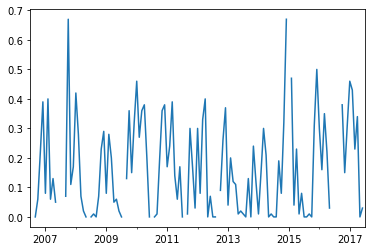

In [5]:
sfo_weather.resample('M').max().PrecipitationIn.plot()

## We can aggregate over various times and calculate statistics

In [6]:
g = sfo_weather.groupby(sfo_weather.index.year)

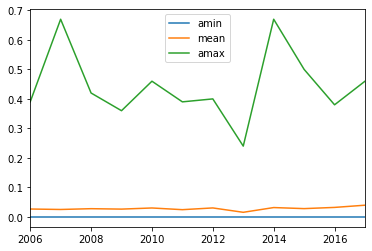

In [7]:
g.aggregate([np.min, np.mean, np.max])['PrecipitationIn'].plot()

In [8]:
sfo_weather.columns

Index(['Conditions', 'DateUTC', 'Dew PointF', 'Events', 'Gust SpeedMPH',
       'Humidity', 'PrecipitationIn', 'Sea Level PressureIn', 'TemperatureF',
       'TimePDT', 'TimePST', 'VisibilityMPH', 'Wind Direction',
       'Wind SpeedMPH', 'WindDirDegrees'],
      dtype='object')

In [9]:
sfo_weather['Wind Direction'].unique()

array(['WNW', 'Calm', 'NNW', 'NNE', 'North', 'NW', 'South', 'West', 'SSW',
       'Variable', 'WSW', 'SW', 'NE', 'SSE', 'SE', 'East', 'ENE', 'ESE'],
      dtype=object)

## let's convert these to degrees and radians and make a rose plot

Conversions:
http://blog.weatherflow.com/degrees-of-wind-direction-along-south-carolina-onshore-vs-offshore/

In [10]:
dir_str = ['WNW', 'Calm', 'NNW', 'NNE', 'North', 'NW', 'South', 'West', 'SSW',
       'Variable', 'WSW', 'SW', 'NE', 'SSE', 'SE', 'East', 'ENE', 'ESE']
dir_deg = np.array([52, 0, 60, 20, 64, 56, 32, 48, 36,
               0, 44, 40, 8, 28, 24, 16, 12, 20])*360/64

In [14]:
wind_lookup = dict(zip(dir_str,dir_deg))
wind_lookup

{'WNW': 292.5,
 'Calm': 0.0,
 'NNW': 337.5,
 'NNE': 112.5,
 'North': 360.0,
 'NW': 315.0,
 'South': 180.0,
 'West': 270.0,
 'SSW': 202.5,
 'Variable': 0.0,
 'WSW': 247.5,
 'SW': 225.0,
 'NE': 45.0,
 'SSE': 157.5,
 'SE': 135.0,
 'East': 90.0,
 'ENE': 67.5,
 'ESE': 112.5}

In [15]:
sfo_weather['wind_deg'] = [wind_lookup[i] for i in sfo_weather['Wind Direction']]
sfo_weather.head()

,Conditions,DateUTC,Dew PointF,Events,Gust SpeedMPH,Humidity,PrecipitationIn,Sea Level PressureIn,TemperatureF,TimePDT,TimePST,VisibilityMPH,Wind Direction,Wind SpeedMPH,WindDirDegrees,wind_deg
2006-07-28 00:56:00,Partly Cloudy,2006-07-28 07:56:00,55.0,NaN,-,87.0,NaN,29.95,59.0,00:56:00,NaN,10.0,WNW,3.5,300,292.5
2006-07-28 01:56:00,Scattered Clouds,2006-07-28 08:56:00,55.0,NaN,-,87.0,NaN,29.94,59.0,01:56:00,NaN,10.0,WNW,5.8,300,292.5
2006-07-28 02:56:00,Mostly Cloudy,2006-07-28 09:56:00,55.9,NaN,-,90.0,NaN,29.94,59.0,02:56:00,NaN,10.0,WNW,4.6,300,292.5
2006-07-28 03:56:00,Overcast,2006-07-28 10:56:00,55.0,NaN,-,83.0,NaN,29.94,60.1,03:56:00,NaN,10.0,WNW,4.6,290,292.5
2006-07-28 04:56:00,Overcast,2006-07-28 11:56:00,55.9,NaN,-,86.0,NaN,29.94,60.1,04:56:00,NaN,10.0,WNW,3.5,290,292.5


### Convert to Radians

In [16]:
sfo_weather['wind_rad'] = sfo_weather.wind_deg* np.pi/180

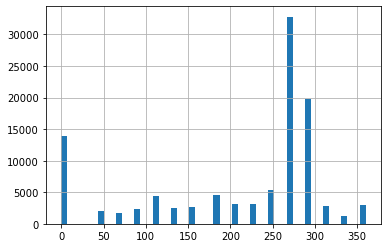

In [17]:
sfo_weather['wind_deg'].hist(bins=50)

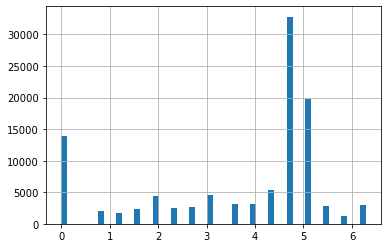

In [18]:
sfo_weather['wind_rad'].hist(bins=50)

In [19]:
counts, bins = np.histogram(sfo_weather['wind_rad'], bins=50)

In [20]:
counts

array([13982,     0,     0,     0,     0,     0,  1971,     0,     0,
        1783,     0,     0,  2301,     0,     0,  4358,     0,     0,
        2574,     0,     0,  2618,     0,     0,  4586,     0,     0,
           0,  3095,     0,     0,  3172,     0,     0,  5327,     0,
           0, 32807,     0,     0, 19732,     0,     0,  2855,     0,
           0,  1275,     0,     0,  2936], dtype=int64)

In [21]:
bins

array([0.        , 0.12566371, 0.25132741, 0.37699112, 0.50265482,
       0.62831853, 0.75398224, 0.87964594, 1.00530965, 1.13097336,
       1.25663706, 1.38230077, 1.50796447, 1.63362818, 1.75929189,
       1.88495559, 2.0106193 , 2.136283  , 2.26194671, 2.38761042,
       2.51327412, 2.63893783, 2.76460154, 2.89026524, 3.01592895,
       3.14159265, 3.26725636, 3.39292007, 3.51858377, 3.64424748,
       3.76991118, 3.89557489, 4.0212386 , 4.1469023 , 4.27256601,
       4.39822972, 4.52389342, 4.64955713, 4.77522083, 4.90088454,
       5.02654825, 5.15221195, 5.27787566, 5.40353936, 5.52920307,
       5.65486678, 5.78053048, 5.90619419, 6.03185789, 6.1575216 ,
       6.28318531])

In [22]:
bins=(bins[1:]+bins[:-1])/2

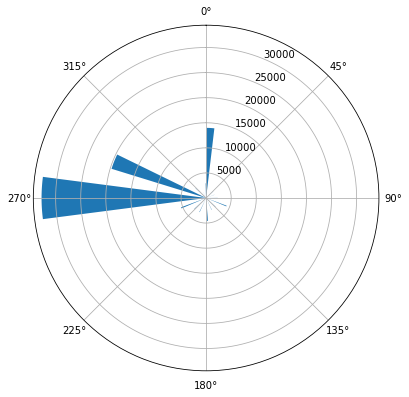

In [23]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
widths = np.pi/4e5*counts
bars = ax.bar(bins,counts, width=widths)


## Cool -- is it seasonal?

In [24]:
# let's grab the calendar module to convert month numbers to names
import calendar

In [25]:
with PdfPages(os.path.join('data','monthly_wind_dir.pdf')) as outpdf:
    for cn, cg in sfo_weather.groupby(sfo_weather.index.month):
        print('plotting for {0}'.format(calendar.month_name[cn]))
        counts, bins = np.histogram(cg['wind_rad'], bins=50)
        bins = (bins[1:]+bins[:-1])/2
        fig = plt.figure()
        ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)
        widths = np.pi/4e4*counts
        bars = ax.bar(bins,counts, width=widths)
        plt.title(calendar.month_name[cn])
        outpdf.savefig()
        plt.close()

plotting for January
plotting for February
plotting for March
plotting for April
plotting for May
plotting for June
plotting for July
plotting for August
plotting for September
plotting for October
plotting for November
plotting for December


## Look at wind speed --- needs some cleaning

In [ ]:
sfo_weather['Wind SpeedMPH'].unique()

In [ ]:
sfo_weather.dtypes

In [ ]:
sfo_weather['Wind SpeedMPH'] = [0 if i == 'Calm' else float(i) for i in sfo_weather['Wind SpeedMPH']]

In [ ]:
sfo_weather['Wind SpeedMPH'].hist(bins=50)

In [ ]:
len(sfo_weather.loc[sfo_weather['Wind SpeedMPH']>50])

In [ ]:
sfo_weather['Wind SpeedMPH'] = [0 if i == 'Calm' else np.nan if float(i) > 55 else float(i) for i in sfo_weather['Wind SpeedMPH']]

In [ ]:
sfo_weather['Wind SpeedMPH'].describe()

## Is there fog at SFO?

In [ ]:
sfo_weather.VisibilityMPH.unique()

In [ ]:
sfo_weather.VisibilityMPH[sfo_weather.VisibilityMPH>50].count()

In [ ]:
sfo_weather.loc[sfo_weather.VisibilityMPH>50,'VisibilityMPH'] = np.nan

In [ ]:
sfo_weather.VisibilityMPH[sfo_weather.VisibilityMPH>50].count()

In [ ]:
sfo_weather.VisibilityMPH.hist()

In [ ]:
for cn, cg in sfo_weather.groupby(sfo_weather.index.month):
    plt.figure()
    cg.VisibilityMPH.hist()
    plt.title(calendar.month_name[cn])
    

## Let's look at Gusts. More data cleaning!

In [ ]:
sfo_weather['Gust SpeedMPH'].unique()

In [ ]:
sfo_weather.loc[sfo_weather['Gust SpeedMPH']=='-','Gust SpeedMPH'] = np.nan
sfo_weather['Gust SpeedMPH'] = sfo_weather['Gust SpeedMPH'].astype(float)

In [ ]:
sfo_weather['Gust SpeedMPH'].hist()

In [ ]:
sfo_weather['Gust SpeedMPH'].groupby(sfo_weather.index.year).aggregate([np.min, np.mean, np.max]).plot(kind='bar')

In [ ]:
sfo_weather['Gust SpeedMPH'].groupby(sfo_weather.index.month).aggregate([np.min, np.mean, np.max]).plot(kind='bar')

## Which is the most variable month for gusts

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sfo_weather['Gust SpeedMPH'].groupby(sfo_weather.index.month).aggregate(np.std).plot(kind='bar')
ax.set_xticklabels([calendar.month_name[i] for i in list(range(1,13))]);

In [ ]:
sfo_weather['Gust SpeedMPH'].groupby(sfo_weather.index.day).aggregate(
    [np.min, np.mean, np.max]).plot(kind='bar', figsize=(10,4))